In [19]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

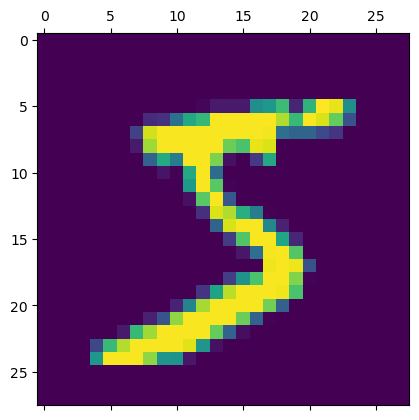

In [11]:
plt.matshow(X_train[0])

In [13]:
y_train[2]

4

In [26]:
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [36]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train_flat.shape

(60000, 784)

In [29]:
X_train_flat[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [40]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1877 - accuracy: 0.5925
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9766 - accuracy: 0.7038
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7903 - accuracy: 0.7394
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6266 - accuracy: 0.7610
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4838 - accuracy: 0.7751


In [41]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4042 - accuracy: 0.8010


[1.4041820764541626, 0.8009999990463257]

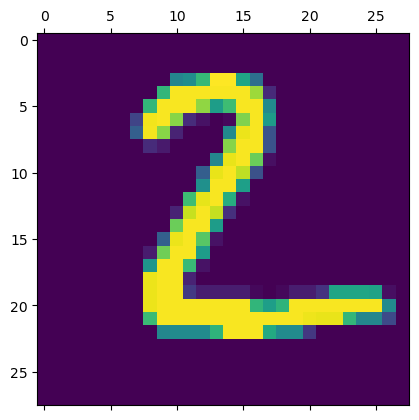

In [48]:
plt.matshow(X_test[1])

In [43]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


In [46]:
y_pred[1]

array([0.38994253, 0.4117192 , 0.6115057 , 0.55173576, 0.18439111,
       0.44540748, 0.53467834, 0.15373953, 0.40120316, 0.18096408],
      dtype=float32)

In [47]:
np.argmax(y_pred[1])

2

In [50]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [54]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

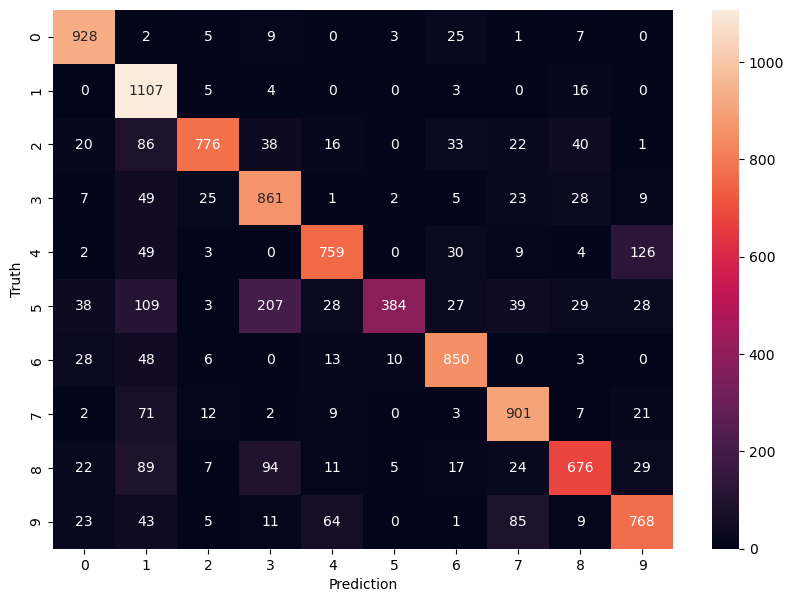

In [55]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [56]:
#adding hidden layer
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 964us/step - loss: 1.2420 - accuracy: 0.6972
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.5211 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8909
Epoch 4/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.3551 - accuracy: 0.9005
Epoch 5/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.3294 - accuracy: 0.9064


In [57]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 705us/step - loss: 0.3104 - accuracy: 0.9124


[0.31040921807289124, 0.9124000072479248]

313/313 [==============================] - 0s 651us/step


Text(95.72222222222221, 0.5, 'Truth')

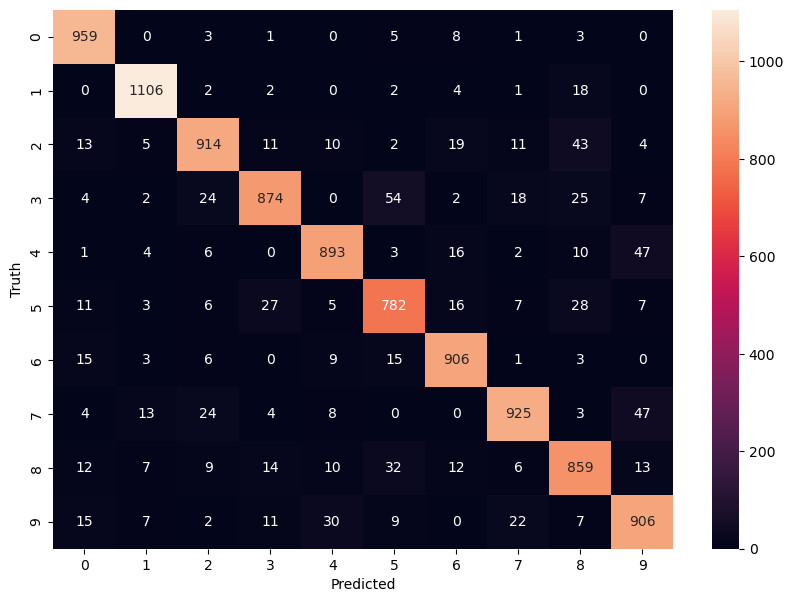

In [63]:
y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')